# Introduction-  AvoCare   

## Company Introduction

Your client for this project is a major Avocado Producer.

Their avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.
With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

## Current Scenario
Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.
Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

# Problem Statement

The current process suffers from the following problems:

The price of avocado is dependent on global demands and seasonal production.
Due to these reasons, it is quite difficult to know for certain the price in the future.

The company has hired you as data science consultants. They want to automate the process of predicting the future price of avocado, based on the historical data.

# Your Role
You are given a dataset containing the weekly retail scan data of avocadoes.
Your task is to build a regression model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

# Project Deliverables
- Deliverable: Predict the average price of a single avocado.
- Machine Learning Task: Regression
- Target Variable: AveragePrice
- Win Condition: N/A (best possible model)

# Evaluation Metric
The model evaluation will be based on the **RMSE score.**

# Data Description

- The dataset contains weekly retail scan data for National Retail Volume (units) and price.

- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

- The column AveragePrice is the average price of a single avocado.

- This is the data that we have to predict for future samples.

- The dataset is divided into two parts: Train and Test sets.

# Train Set:
- The train set contains **14599 rows and 14 columns.**
- The last column **AveragePrice is the target variable.**

# Test Set:
- The test set contains **3650 rows and 13 columns.**
- The test set doesn’t contain the AveragePrice column.
- It needs to be predicted for the test set.

## Dataset Feature Description

|Id|Feature|Description|
|:--|:--|:--|
|01|Id| Unique identity of each observation|
|02|Date|The date of the observation|
|03|AveragePrice| The average price of a single avocado|
|04|Total Volume| Total number of avocados sold.|
|05|4046| Total number of avocados with PLU 4046 sold.|
|06|4225| Total number of avocados with PLU 4770 sold.|
|07|4770| Total number of avocados with PLU 4770 sold. |
|08|Total Bags| Total number of bags sold.|
|09|Small Bags| Total number of small bags sold.|
|10|Large Bags| Total number of large bags sold.|
|11|sugarpercent| Total number of extra-large bags sold.|
|12|type| Type of an avocado (conventional or organic).|
|13|year| The year of observation.|
|14|Region| The city or region of the observation.|

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

# Knowing the Dataset

In [2]:
data = pd.read_csv('../avacado-price-prediction/avocado_train.csv') 

In [3]:
data

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.00,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.00,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.00,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.00,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.00,organic,2016,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,3830,2016-05-08,0.93,228601.39,17356.36,106300.33,18838.87,86105.83,54973.21,27766.71,3365.91,conventional,2016,Indianapolis
14595,650,2015-07-05,1.19,736913.15,146171.45,428389.18,19546.92,142805.60,88349.57,54456.03,0.00,conventional,2015,Denver
14596,2574,2015-07-05,1.45,68922.42,797.75,35080.61,3980.63,29063.43,28845.65,217.78,0.00,conventional,2015,Syracuse
14597,7731,2017-02-05,0.97,212143.72,75074.86,76042.48,151.02,60875.36,59129.65,1337.38,408.33,conventional,2017,Roanoke


# EDA 

## - General interpretation of the dataset

In [4]:
print('Shape of Train dataset: ', data.shape)
data.head()

Shape of Train dataset:  (14599, 14)


,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


In [6]:
data['Date'] = data['Date'].astype('datetime64[ns]')

In [7]:
data['Date'] = data['Date'].astype('int64')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  int64  
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(3), object(2)
memory usage: 1.6+ MB


In [9]:
data.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [10]:
data.describe()

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,1.459900e+04,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,9116.120899,1.471157e+18,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,5279.989902,2.946602e+16,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,2.000000,1.420330e+18,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4538.500000,1.445731e+18,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,9125.000000,1.471133e+18,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,13698.500000,1.496534e+18,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,18249.000000,1.521936e+18,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
data.describe(include = object)

,type,region
count,14599,14599
unique,2,54
top,conventional,Tampa
freq,7301,285


In [12]:
data.isnull().sum()                                     # Checking Missing values

Id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
print('Duplicated values in the Trained Dataset: ',data.duplicated().any())    # Checking Duplicated Values

Duplicated values in the Trained Dataset:  False


In [14]:
data.corr()

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Id,1.000000,0.458304,0.582187,-0.170061,-0.167313,-0.187360,-0.185934,-0.130820,-0.138091,-0.098125,-0.102792,0.478168
Date,0.458304,1.000000,0.152246,0.007908,-0.006629,-0.019043,-0.048545,0.064598,0.056676,0.081957,0.071966,0.950234
AveragePrice,0.582187,0.152246,1.000000,-0.194316,-0.210214,-0.173584,-0.178898,-0.178161,-0.175261,-0.174219,-0.118503,0.099698
Total Volume,-0.170061,0.007908,-0.194316,1.000000,0.975787,0.972964,0.865017,0.961430,0.965507,0.872056,0.747936,0.016044
4046,-0.167313,-0.006629,-0.210214,0.975787,1.000000,0.920712,0.824506,0.914055,0.919157,0.826518,0.695311,0.002110
4225,-0.187360,-0.019043,-0.173584,0.972964,0.920712,1.000000,0.879280,0.902999,0.913477,0.799675,0.690658,-0.011195
4770,-0.185934,-0.048545,-0.178898,0.865017,0.824506,0.879280,1.000000,0.783390,0.793953,0.682296,0.693546,-0.037146
Total Bags,-0.130820,0.064598,-0.178161,0.961430,0.914055,0.902999,0.783390,1.000000,0.993775,0.937043,0.803396,0.071005
Small Bags,-0.138091,0.056676,-0.175261,0.965507,0.919157,0.913477,0.793953,0.993775,1.000000,0.892609,0.809134,0.063230
Large Bags,-0.098125,0.081957,-0.174219,0.872056,0.826518,0.799675,0.682296,0.937043,0.892609,1.000000,0.693906,0.087499


<AxesSubplot:>

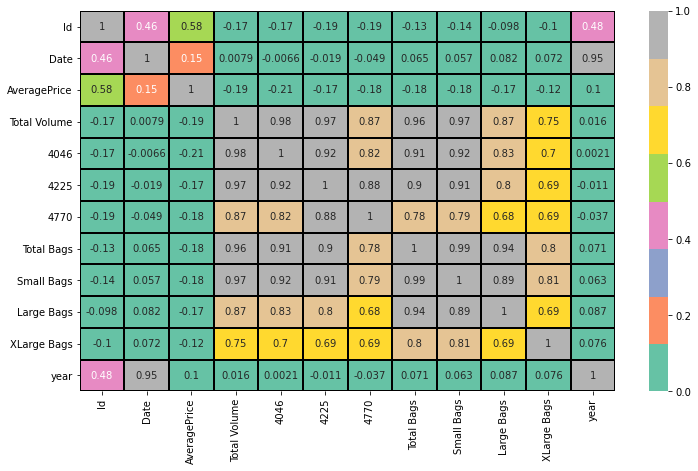

In [15]:
figure = plt.figure(figsize = (12,7))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Set2',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

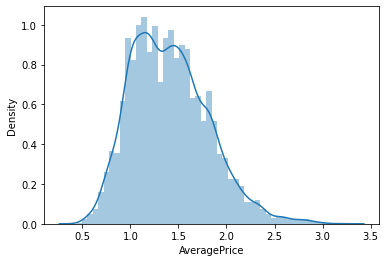

In [16]:
sns.distplot(data['AveragePrice'], kde = True)

<AxesSubplot:>

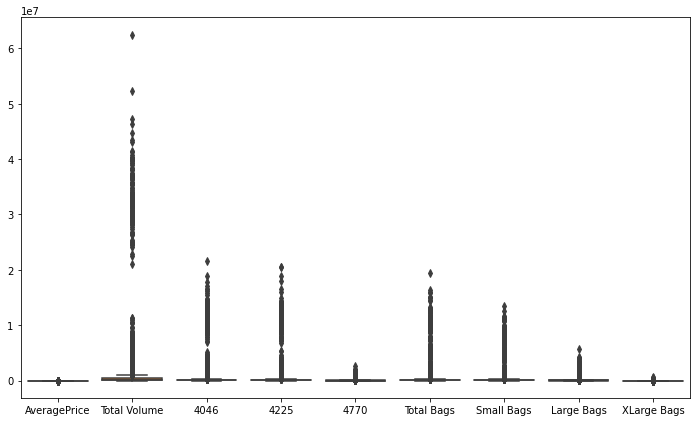

In [17]:
figure = plt.figure(figsize = (12,7))
sns.boxplot(data = data[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])

# Data Preprocessing

- ### Handling Categorical columns using LabelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df_num = data.select_dtypes(include = ['int64','float64'])
df_cat = data.drop(df_num, axis = 1)

In [20]:
df_cat = df_cat.apply(le.fit_transform)

In [21]:
data = pd.concat([df_num, df_cat], axis = 1)

In [22]:
data = data[['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region']]

In [23]:
data.head()

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,1503187200000000000,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,1,2017,0
1,6843,1510444800000000000,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,0,2017,23
2,7306,1486857600000000000,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,0,2017,31
3,12329,1463875200000000000,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,1,2016,7
4,12036,1452384000000000000,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,1,2016,1


# Feature Extraction and Model Selection

In [24]:
data_features = data.drop(['AveragePrice'], axis = 1)
data_target = data['AveragePrice']

In [25]:
print('Shape of data Features: ', data_features.shape)
print('Shape of data Targets: ', data_target.shape)

Shape of data Features:  (14599, 13)
Shape of data Targets:  (14599,)


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size = 0.2, random_state = 4)

In [28]:
print('Shape of x train: ', X_train.shape)
print('Shape of x test: ', X_test.shape)
print('Shape of y train: ', y_train.shape)
print('Shape of y test: ', y_test.shape)

Shape of x train:  (11679, 13)
Shape of x test:  (2920, 13)
Shape of y train:  (11679,)
Shape of y test:  (2920,)


In [29]:
X_train.columns

Index(['Id', 'Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

# Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
numeric_features = X_train[['Date','Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region']].columns
numeric_features

Index(['Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

In [32]:
X_train[numeric_features] = sc.fit_transform(X_train[numeric_features])

In [33]:
X_test[numeric_features] = sc.transform(X_test[numeric_features])

In [34]:
X_train.head()

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7414,15177,1.251419,-0.232848,-0.229584,-0.219770,-0.207397,-0.228712,-0.225740,-0.220023,-0.171562,1,0.909231,-1.175244
1590,6971,0.881403,0.711726,0.302304,0.945769,0.095849,0.934905,1.012754,0.499950,2.325913,0,0.909231,-0.082482
1895,14689,-0.660333,-0.193476,-0.203554,-0.201029,-0.206337,-0.147693,-0.221414,0.095214,-0.171562,1,-0.157567,1.653083
8196,6344,0.696395,-0.159177,-0.175910,-0.203839,0.115279,-0.095590,-0.070433,-0.203609,0.433031,0,0.909231,-0.853843
7445,16980,1.230863,-0.239513,-0.220608,-0.238744,-0.207397,-0.240338,-0.241058,-0.220042,-0.171562,1,0.909231,1.010281


In [35]:
X_test.head()

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
4868,16158,0.696395,-0.244070,-0.229129,-0.243491,-0.207397,-0.239595,-0.240995,-0.217222,-0.171562,1,0.909231,-0.018201
3432,3210,-0.372542,-0.181702,-0.197100,-0.164449,-0.045275,-0.177013,-0.174293,-0.168653,-0.171562,0,-0.157567,-1.239524
3815,2656,-0.742559,8.505779,7.581025,10.365219,8.733421,6.421144,6.731775,5.070041,3.421829,0,-1.224365,1.588802
12284,3665,-0.105308,-0.162195,-0.193165,-0.142944,-0.203206,-0.122808,-0.100198,-0.212892,0.306860,0,-0.157567,-0.661003
11827,12087,-0.619220,-0.241327,-0.229166,-0.239645,-0.204363,-0.234998,-0.241292,-0.197668,-0.171562,1,-0.157567,-1.560925


# Building the Model
 
 - Using Linear Regression,
 - Decision Tree,
 - Random Forest

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [37]:
lr= LinearRegression()
d_tree = DecisionTreeRegressor(max_leaf_nodes=10, max_features= "sqrt", max_depth=12, min_samples_split=5, min_samples_leaf=4)
rfr= RandomForestRegressor(n_estimators = 20, random_state = 0)

In [38]:
print('Linear Regression: ', lr.fit(X_train, y_train))
print('Decision Tree: ', d_tree.fit(X_train, y_train))
print('Random Forest: ', rfr.fit(X_train, y_train))

Linear Regression:  LinearRegression()
Decision Tree:  DecisionTreeRegressor(max_depth=12, max_features='sqrt', max_leaf_nodes=10,
                      min_samples_leaf=4, min_samples_split=5)
Random Forest:  RandomForestRegressor(n_estimators=20, random_state=0)


In [39]:
pred_lr = lr.predict(X_train)
pred_dt = d_tree.predict(X_train)
pred_rf = rfr.predict(X_train)

# Training with Linear Regression

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [41]:
r2_score_LR = r2_score(y_train, pred_lr)
mse_score_LR = mean_squared_error(y_train, pred_lr)
mae_score_LR = mean_absolute_error(y_train, pred_lr)
rmse_LR = mean_squared_error(y_train, pred_lr, squared=False)

In [42]:
print('Linear Regression: ')
print('R2 score: ', r2_score_LR)
print('MSE Score: ', mse_score_LR)
print('MAE Score: ', mae_score_LR)
print('RMSE Score: ', rmse_LR)

Linear Regression: 
R2 score:  0.4404331104890318
MSE Score:  0.09171654609990804
MAE Score:  0.23318865121322502
RMSE Score:  0.30284739738011296


# Training with decision Tree

In [43]:
r2_score_DT = r2_score(y_train, pred_dt)
mse_score_DT = mean_squared_error(y_train, pred_dt)
mae_score_DT = mean_absolute_error(y_train, pred_dt)
rmse_DT = mean_squared_error(y_train, pred_dt, squared=False)

In [44]:
print('Decision Tree: ')
print('R2 score: ', r2_score_DT)
print('MSE Score: ', mse_score_DT)
print('MAE Score: ', mae_score_DT)
print('RMSE Score: ', rmse_DT)

Decision Tree: 
R2 score:  0.4466942690139527
MSE Score:  0.0906903026869148
MAE Score:  0.23062498519507868
RMSE Score:  0.3011483067973566


# Training with Random Forest

In [45]:
r2_score_RF = r2_score(y_train, pred_rf)
mse_score_RF = mean_squared_error(y_train, pred_rf)
mae_score_RF = mean_absolute_error(y_train, pred_rf)
rmse_RF = mean_squared_error(y_train, pred_rf, squared=False)

In [46]:
print('Random Forest: ')
print('R2 score: ', r2_score_RF)
print('MSE Score: ', mse_score_RF)
print('MAE Score: ', mae_score_RF)
print('RMSE Score: ', rmse_RF)

Random Forest: 
R2 score:  0.9829367673915894
MSE Score:  0.002796771555783886
MAE Score:  0.03537135028683963
RMSE Score:  0.0528845114923442


# Working on Test dataset

In [47]:
test_data = pd.read_csv('../avacado-price-prediction/avocado_test.csv')

In [48]:
print('Shape of the Test dataset: ', test_data.shape)
test_data

Shape of the Test dataset:  (3650, 13)


,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11137,2015-05-03,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,organic,2015,RichmondNorfolk
1,16503,2017-10-08,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,organic,2017,PhoenixTucson
2,6438,2017-07-02,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,conventional,2017,GreatLakes
3,8247,2017-05-14,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,conventional,2017,Syracuse
4,10481,2015-12-13,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,organic,2015,Nashville
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,15250,2017-05-28,12161.37,325.70,4912.89,0.00,6922.78,975.95,5946.83,0.00,organic,2017,CincinnatiDayton
3646,2157,2015-07-12,490312.63,251056.27,182844.55,14524.67,41887.14,38417.55,3469.59,0.00,conventional,2015,SanDiego
3647,2029,2015-12-27,98584.92,33255.50,31680.16,152.86,33496.40,32877.16,0.00,619.24,conventional,2015,Roanoke
3648,11493,2015-06-28,55512.87,37684.23,5875.04,0.00,11953.60,11251.56,702.04,0.00,organic,2015,SouthCentral


In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            3650 non-null   int64  
 1   Date          3650 non-null   object 
 2   Total Volume  3650 non-null   float64
 3   4046          3650 non-null   float64
 4   4225          3650 non-null   float64
 5   4770          3650 non-null   float64
 6   Total Bags    3650 non-null   float64
 7   Small Bags    3650 non-null   float64
 8   Large Bags    3650 non-null   float64
 9   XLarge Bags   3650 non-null   float64
 10  type          3650 non-null   object 
 11  year          3650 non-null   int64  
 12  region        3650 non-null   object 
dtypes: float64(8), int64(2), object(3)
memory usage: 370.8+ KB


In [50]:
test_data['Date'] = test_data['Date'].astype('datetime64[ns]')
test_data['Date'] = test_data['Date'].astype('int64')

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            3650 non-null   int64  
 1   Date          3650 non-null   int64  
 2   Total Volume  3650 non-null   float64
 3   4046          3650 non-null   float64
 4   4225          3650 non-null   float64
 5   4770          3650 non-null   float64
 6   Total Bags    3650 non-null   float64
 7   Small Bags    3650 non-null   float64
 8   Large Bags    3650 non-null   float64
 9   XLarge Bags   3650 non-null   float64
 10  type          3650 non-null   object 
 11  year          3650 non-null   int64  
 12  region        3650 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 370.8+ KB


In [52]:
test_data.isnull().sum()

Id              0
Date            0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [53]:
print('Duplicated values in the Test Dataset: ',test_data.duplicated().any())

Duplicated values in the Test Dataset:  False


In [54]:
test_data.columns

Index(['Id', 'Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [55]:
test_data.describe()

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,3650.000000,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3.650000e+03,3650.000000,3650.000000
mean,9160.513973,1.471026e+18,9.985644e+05,3.499917e+05,3.417070e+05,2.717581e+04,2.796875e+05,2.124299e+05,6.370799e+04,3549.613236,2016.154795
std,5221.228262,2.967298e+16,4.032615e+06,1.473789e+06,1.398324e+06,1.250919e+05,1.142301e+06,8.626779e+05,2.789935e+05,19131.611332,0.949469
min,1.000000,1.420330e+18,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4680.250000,1.445126e+18,1.102260e+04,8.848725e+02,2.938223e+03,0.000000e+00,5.284002e+03,2.942858e+03,1.088600e+02,0.000000,2015.000000
50%,9131.000000,1.470528e+18,1.100332e+05,9.726290e+03,2.960670e+04,2.063600e+02,4.000460e+04,2.666419e+04,2.831680e+03,0.000000,2016.000000
75%,13653.750000,1.496534e+18,4.628083e+05,1.204247e+05,1.654237e+05,6.666458e+03,1.193041e+05,8.490868e+04,2.463901e+04,147.990000,2017.000000
max,18248.000000,1.521936e+18,6.103446e+07,2.274362e+07,2.032816e+07,1.800066e+06,1.629830e+07,1.256716e+07,3.789723e+06,377661.060000,2018.000000


# Label Encoding (Handling Categorical Values)

In [56]:
df_num1 = test_data.select_dtypes(include = ['int64','float64'])
df_cat1 = test_data.drop(df_num1, axis = 1)

In [57]:
df_cat1 = df_cat1.apply(le.fit_transform)

In [58]:
test_data = pd.concat([df_num1, df_cat1], axis = 1)

In [59]:
test_data = test_data[['Id', 'Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']]

In [61]:
test_data.head()

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11137,1430611200000000000,12425.42,426.78,6174.20,548.21,5276.23,2313.33,2962.90,0.00,1,2015,38
1,16503,1507420800000000000,11837.20,2749.91,124.43,0.00,8962.86,8921.88,40.98,0.00,1,2017,33
2,6438,1498953600000000000,4250394.01,740503.01,1423924.97,356791.68,1729174.35,1157601.31,485376.01,86197.03,0,2017,15
3,8247,1494720000000000000,74951.66,1032.62,43170.45,42.00,30706.59,28525.65,2180.94,0.00,0,2017,49
4,10481,1449964800000000000,4594.71,592.64,2602.48,0.00,1399.59,696.67,702.92,0.00,1,2015,26


# Scaling 

In [62]:
test_data[numeric_features]= sc.fit_transform(test_data[numeric_features])
test_data.head()

,Id,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,11137,-1.362179,-0.244574,-0.237220,-0.239986,-0.212893,-0.240260,-0.243597,-0.217759,-0.185562,1,-1.21642,0.713806
1,16503,1.226712,-0.244720,-0.235644,-0.244313,-0.217276,-0.237032,-0.235935,-0.228234,-0.185562,1,0.89031,0.392810
2,6438,0.941322,0.806493,0.265007,0.774045,2.635350,1.269092,1.095775,1.511597,4.320532,0,0.89031,-0.762773
3,8247,0.798627,-0.229067,-0.236809,-0.213525,-0.216941,-0.217994,-0.213208,-0.220562,-0.185562,0,0.89031,1.419995
4,10481,-0.709860,-0.246516,-0.237108,-0.242541,-0.217276,-0.243654,-0.245471,-0.225861,-0.185562,1,-1.21642,-0.056583


# Predicting Avocado Price Prediction

In [63]:
y_pred_test_final = rfr.predict(test_data)

In [64]:
y_pred_test_final

array([1.4805, 1.936 , 1.2885, ..., 1.1535, 1.631 , 1.605 ])

# Converting Array to Dataframe

In [65]:
y_pred_test_final = pd.DataFrame(y_pred_test_final)

In [66]:
y_pred_test_final

,0
0,1.4805
1,1.9360
2,1.2885
3,1.4525
4,2.1485
...,...
3645,1.5695
3646,1.0695
3647,1.1535
3648,1.6310


In [67]:
data_submission = test_data['Id']

# Preparing Submission File

In [68]:
submission_file = pd.concat([data_submission,y_pred_test_final], axis = 1)

In [69]:
submission_file 

,Id,0
0,11137,1.4805
1,16503,1.9360
2,6438,1.2885
3,8247,1.4525
4,10481,2.1485
...,...,...
3645,15250,1.5695
3646,2157,1.0695
3647,2029,1.1535
3648,11493,1.6310


# Saving Avocado Price Prediction in Excel Sheet

In [70]:
submission_file.to_csv('Avocado_price_prediction_submission.csv', header=False, index=False)